# **Objective : Exploratory Data Analysis and Hypothesis Testing**


## **Overview:**
1. Introduction to problem statement

2. Hypothesis generation with respect to problem statement

3. Introduction to dataset

4. Importing dataset and required libraries.

5. Variable Identification and Typecasting

6. Univariate Analysis:

    6.1 Numerical Variables

    6.2 Categorical Variables

    6.3 Missing Values

    6.4 Summary of Univariate Analysis
    
7. Bivariate Analysis and Hypothesis Testing

    7.1 Bivariate Analysis: Numerical-Numerical

    7.2 Bivariate Analysis: Numerical-Categorical

    7.3 Bivariate Analysis : Missing Values
    
    7.4 Bivariate Analysis: Summary

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

## **1. Introduction to problem statement**

---

Sales Prediction for Big Mart Outlets:<br>
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


## **2. Hypothesis generation with respect to problem statement.**

1. Item weight might effect a sales of the product.
2. Sales of the product may be depends on the items fat content.
3. More Item_Visibility of a particular product may be costlier than other products.
4. Item type could have an effect on the sales.
5. Are the items with more MRP have more item outlet sales.
6. Are the stores which have established earlier have more sales.
7. Size of the stores could have an effect on the item sales at a particular store.
8. Location of the stores might depends on the Item outlet sales.
9. Are the supermarkets have more sales than others.


## **3. Introduction to dataset.**




Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.


| Variable             | Definition                                                                             	|
|----------------------	|----------------------------------------------------------------------------------------	|
| Item_Identifier         	| Unique Product ID                                                                  	|
| Item_Weight           	| Weight of product                                                               	|
| Item_Fat_Content       |Whether the product is low fat or not                                                       	|
| Item_visibility       	| The % of total display area of all products in a store allocated to the particular product                                                                        	|
| Item_Type              	| The category to which the product belongs.                                                                    	|
| Item_MRP  	| Maximum retail price(list price) of the product.                                                   	|
| Outlet_Identifier        	| Unique store ID. 	|
| Outlet_Establishment_Year  | The year in which store was established.                                                                  |
| Outlet_Size 	| The size of the store in terms of groud area covered.                                                  	|
| Outlet_Location_Type    	|The type of city in which the store is located.                                                             	|
| Outlet_Type     	| Whether the outlet is just a grocery store or some sort of supermarket                    	|
| Item_Outlet_Sales        	 |Sales of the product in the particulat store. This is the outcome variable to be predicted.  |                               	

## 4 **Importing dataset and required libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [2]:

#importing dataset

train = pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')
test = pd.read_csv('/kaggle/input/bigmart-sales-data/Test.csv')
train.head()
                 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


### **Observations:**
* This shows that the train and test data is imported successfully.
* The train data consists of 8,523 training examples with 12 features.
* The test data consists of 5,681 training examples with 11 features


## **5. Variable Identification and type casting.**
In this section, our task is to identify all the variables present in the dataset that are provided in the data dictionary and also identify the data types of the variables and if needed convert them in specific type by thinking manually.<br>

So let's dive into this.....

* **Checking whether all the variables provided in data dictionary are presented in our data**


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

**Observation:** Here it clearly visible that all the variables are presented in our train and test dataset that are provide in data dictionary.

* **Finding some basic information about the features of the data.**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **Numerical Features:**
* Item_Weight
* Item_Visibility
* Item_MRP
* Item_Outlet_Sales(Target Variable)

### **Categorical Features**
* Item_Identifier
* Item_Fat_Content(Ordinal Feature)
* Item_Type
* Outlet_Itemtifier
* Outlet_Establishment_Year
* Outlet_Size(Ordinal Feature)
* Outlet__Location_Type(Ordinal Feature)
* Ootlet_Type(Ordinal Feature)

**Observations:**
* There are 4 float type variables, 1 integer type and 7 object type.
* We are considering Item_Establishment_Year as a categorical feature because it contains some fixed value but not converting its data type now will consider later.
* Item_Fat_Content, Outlet_Size, Outelet_Location_Type and Outlet_Type are ordinal features because these values can be arranged in some order.




## **6 Univariate Analysis**

### **6.1 Univariate Analysis: Numerical Features**

In this section we are going to explore and analyze the numerical features. So let's get start with the statistical information of the data.

In [8]:
print('Number of trainings examples:', len(train),'\n')
train.describe()

Number of trainings examples: 8523 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### **Observations:**
* Total count of Item_Weight is 7060 which is less than the length of the training dataset, therefore it may contains some missing values.
* The average weight of all items is 12kg and the maximum weight of the item is 21 kg. So it is clear that the stores are not selling heavy weight items.
* The maximum price of the items is 266, so we can say that the stores does not selling costly items like TV, mobile phones, laptops etc.
* Most recent store was established in 2009 and the oldest store was established in 1985.
* Average sales of items is Rs 2181 and the maximum sale is Rs 13,086.

* **Before moving further let's make a list of numerical features.**

In [9]:
numerical = train.select_dtypes(include = ['int64', 'Int64','float64']).dtypes.index
numerical

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
def UVA_numeric(data, var_group, layout = None):
  '''
  data {dataframe}: the bulk data
  var_group {list}: list of variable to analyse
  layout{tuple}   : layout of visualisation (rows x columns)
  '''

  if layout == None:
    layout = (1,len(var_group))

  plt.figure(figsize = (layout[1]*10, layout[0]*10), dpi = 100)


  for j,i in enumerate(var_group):
    min = data[i].min()
    max = data[i].max()
    range = data[i].max() - data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    std_dev = data[i].std()
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()

    points = mean-std_dev, mean+std_dev

    #plotting of numeric features with all information.
    plt.subplot(layout[0],layout[1],j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'red', label = 'std_dev')
    sns.scatterplot([min,max], [0,0], color ='red', label = 'min/max')
    sns.scatterplot([mean], [0], color = 'blue', label = 'mean')
    sns.scatterplot([median], [0], color = 'green', label = 'median')
    plt.xlabel('{}'.format(i), fontsize = 20, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 16, fontweight = 'bold')
    plt.title('std_dev = {}; kurtosis = {};\n skew = {}; range = {};\n mean = {}; median = {}'.format
                                                                                              ((round(points[0],2), round(points[1],2)),
                                                                                               round(kurtosis,2), round(skew,2),
                                                                                               (round(min,2), round(max,2), round(range,2)),
                                                                                               round(mean,2),
                                                                                               round(median,2)))

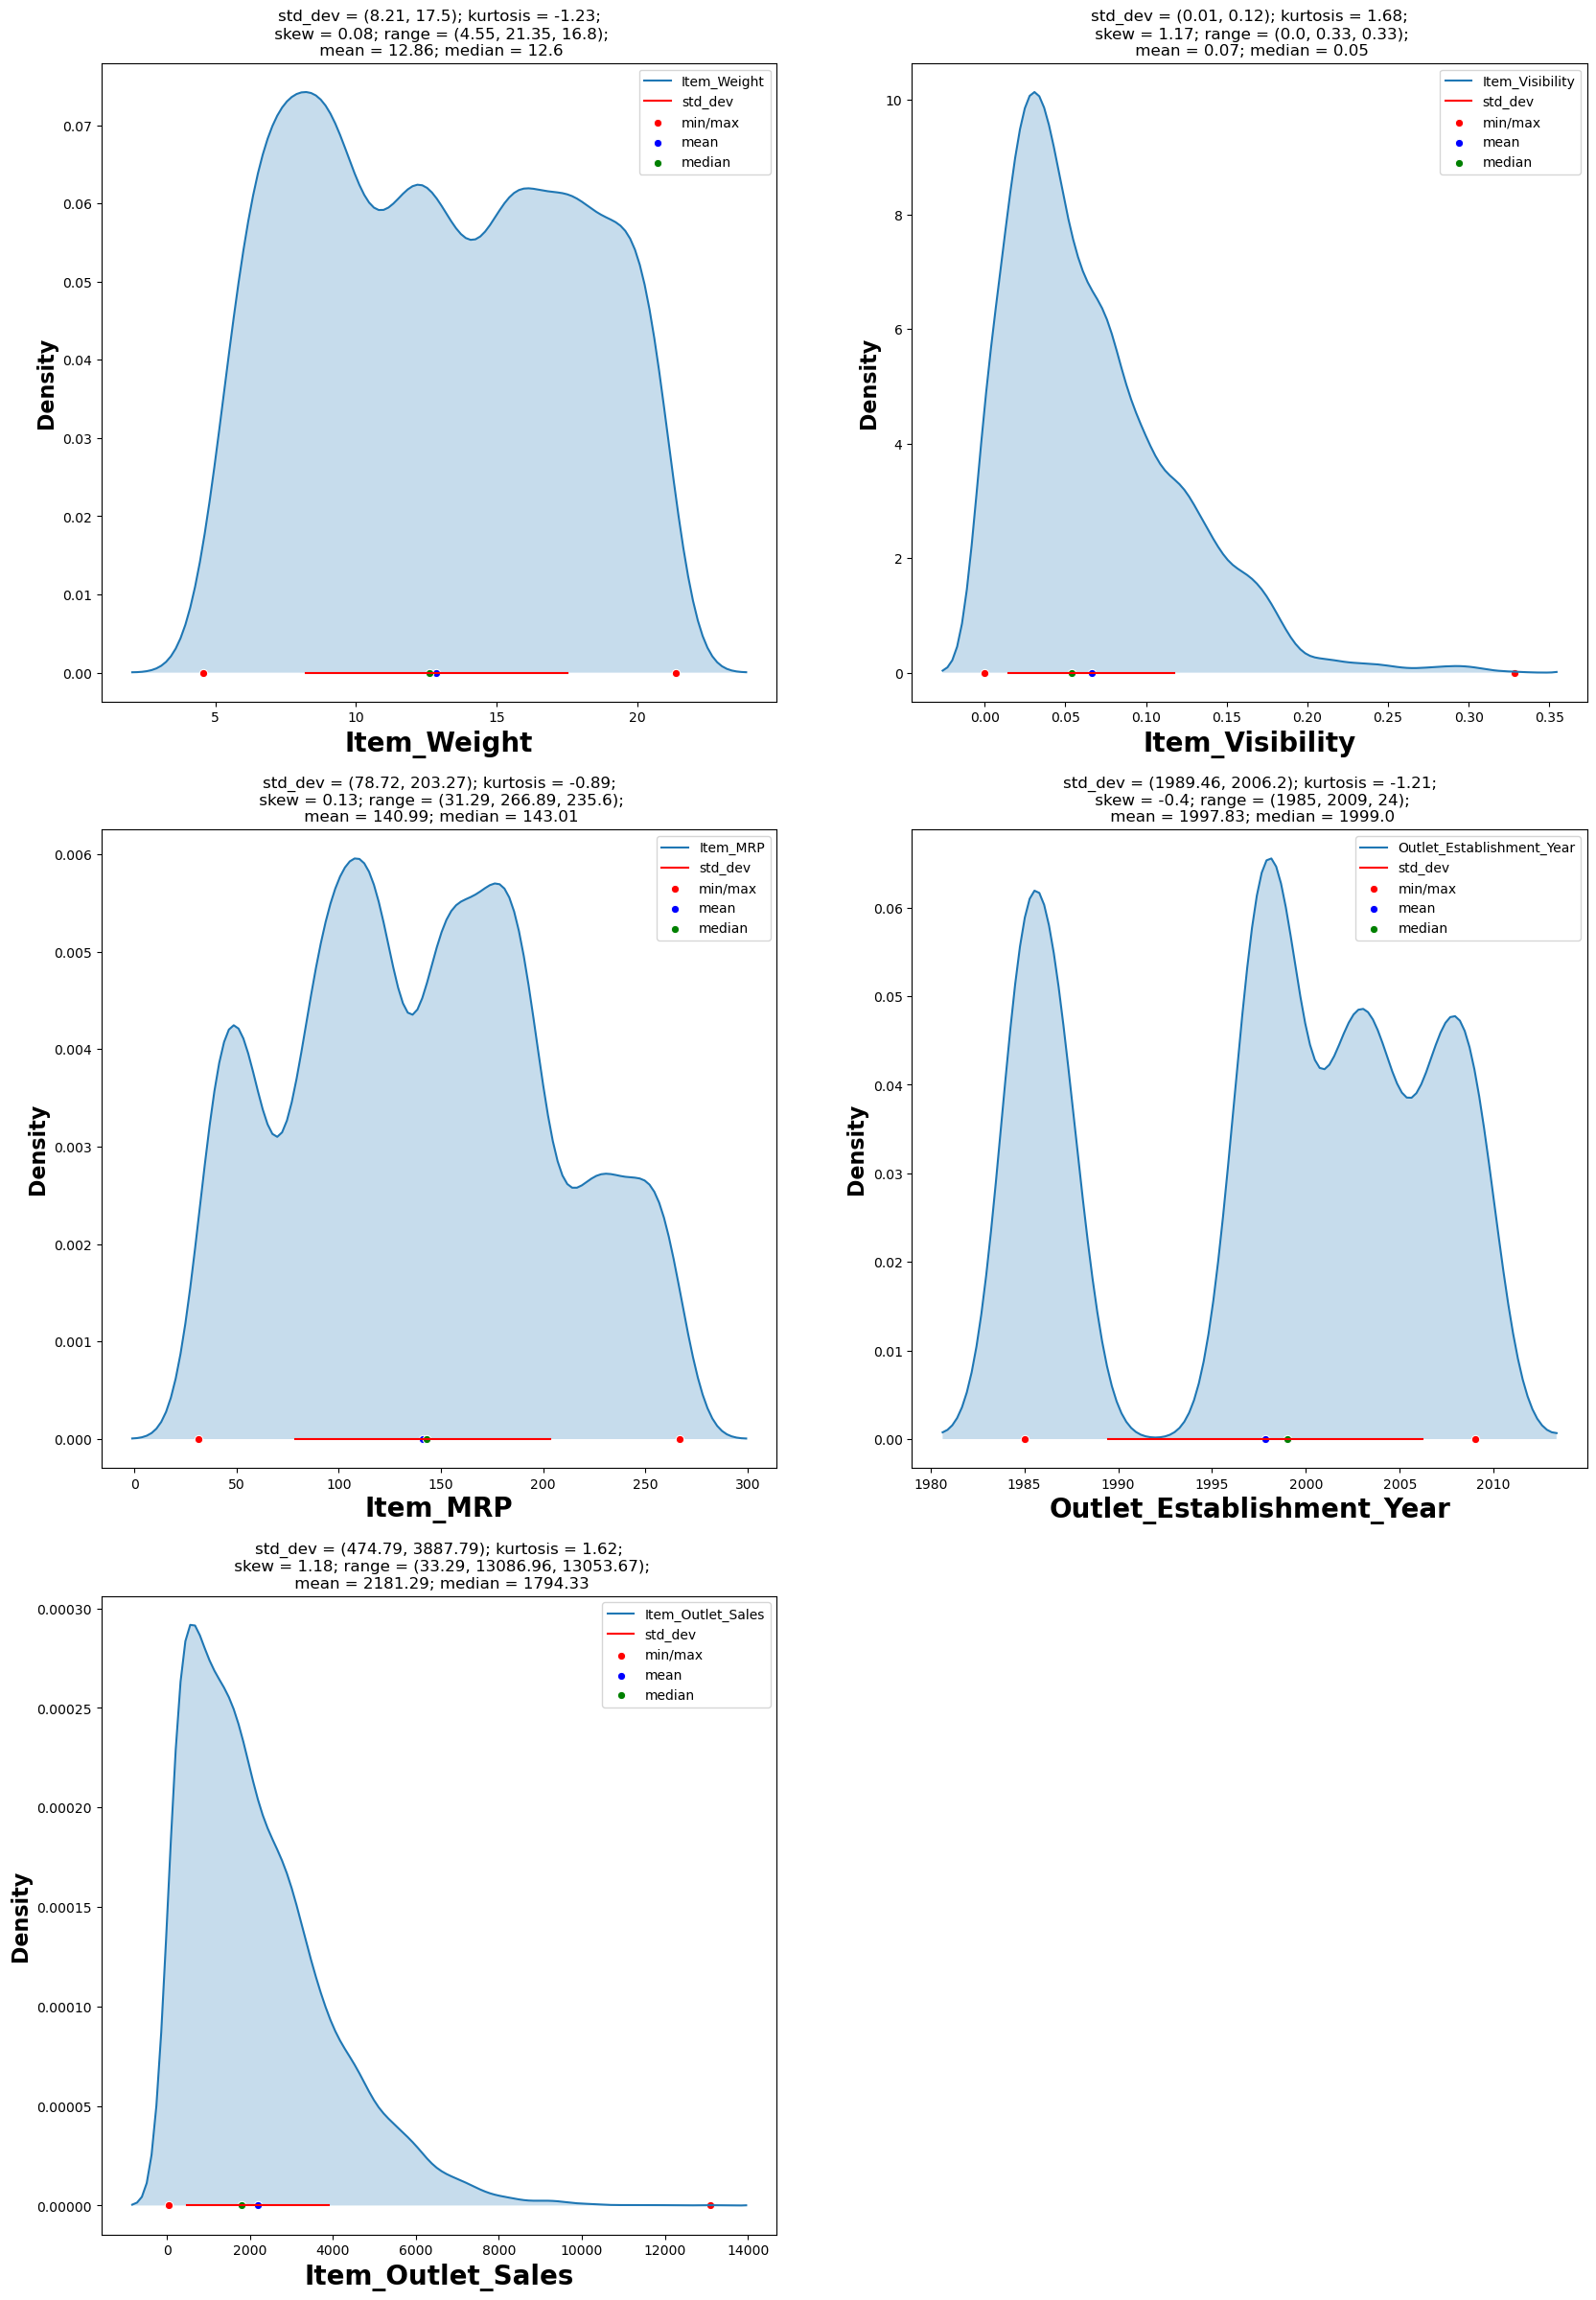

In [11]:
UVA_numeric(train, numerical, (3,2))

### **Observation:**
* The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.
* There are some items that are not visible at all and the maximum visibility of the item is 33%.
* The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.
* Most of the stores are established in year from 1985-1990 and 1995 to 2000.
* From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
* Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000.

### **New Hypothesis**
* Are the items with less visibility having more sales.


## **6.2 Univariate: Categorical Features**
In this section we are going to explore analyze the categorical features, their classes and finding important information from the dataset.

In [12]:
cat_features = train.select_dtypes(include = ['object']).dtypes.index
cat_features

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCJ30     9
NCL31     9
NCI54     9
         ..
FDT35     1
FDN52     1
FDE52     1
FDO33     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
def UVA_Categorical(data, cat):
  plt.figure(figsize = (10,6))
  sns.countplot(cat, data = data)
  plt.xlabel(cat,fontsize = 14, fontweight = 'bold')
  plt.ylabel('Count',fontsize = 14, fontweight = 'bold')
  plt.title('Value counts: \n{}'.format(train[cat].value_counts(normalize = True)))

  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plt.show()

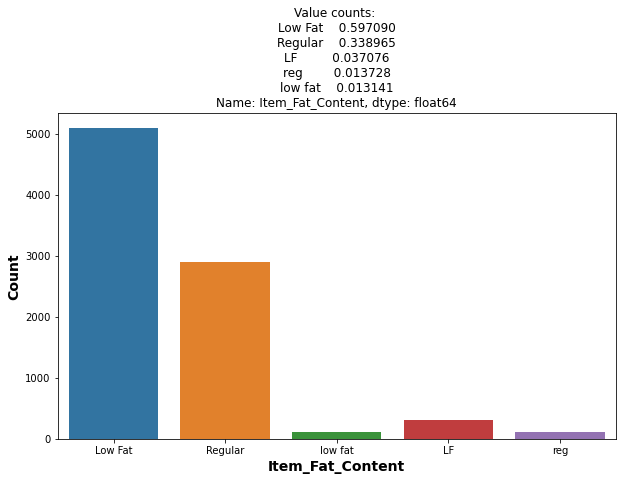

In [15]:
UVA_Categorical(train,'Item_Fat_Content')

### **Observation:**
* Around 64% of the total items contains low fat while remaining contains regular fat.

### **Inference:**
* Low Fat , low fat and lf are all seems to be same as Low Fat there later on we have to rename low fat and LF to Low Fat during preprocessing.
* Regular and reg also seems to same fat content, this also required to rename to Regular during preprocessing.





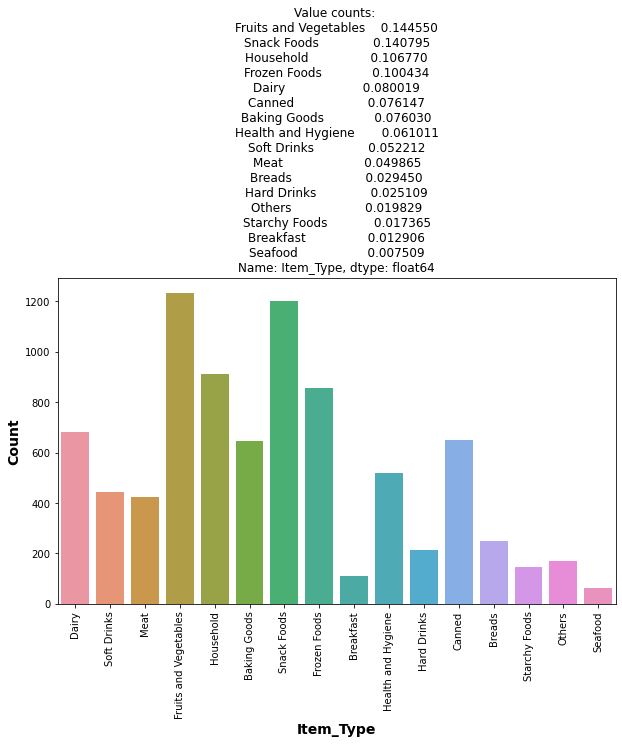

In [16]:
UVA_Categorical(train, 'Item_Type')

### **Oservations:**
* More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods.
* Sale of breakfast and seafood type of items are very less.

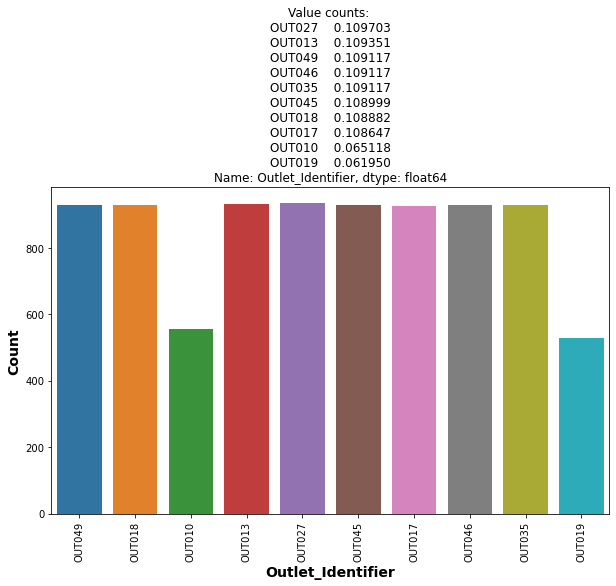

In [17]:
UVA_Categorical(train, 'Outlet_Identifier')

### **Observations:**
* There are total 10 stores.
* All the stores are selling almost same number of items except the OUT010 and OUT019 stores

###**Idea for Bivariate analysis**
* Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.

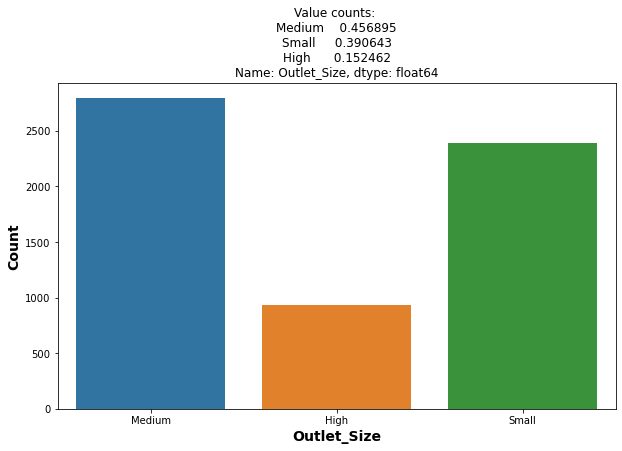

In [18]:
UVA_Categorical(train,'Outlet_Size')

### **Observations:**
* 45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big.

### **New Hypothesis**
* Are the stores with medium size have high sale than others.

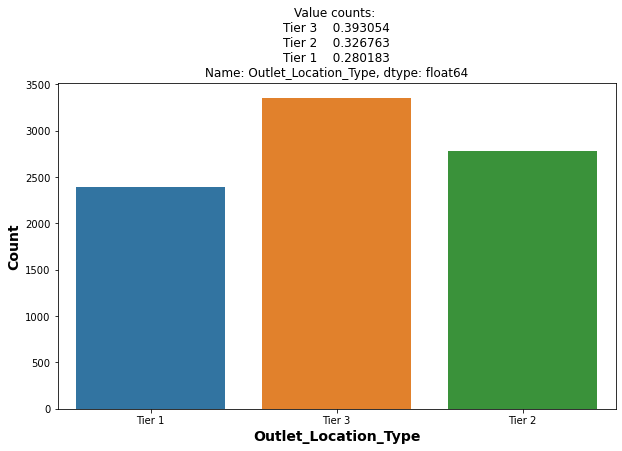

In [19]:
UVA_Categorical(train, 'Outlet_Location_Type')

### **Observations:**
* 39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.

### **New Hypothesis**
* Are the stores located in Tier 3 cities have more sale than other.

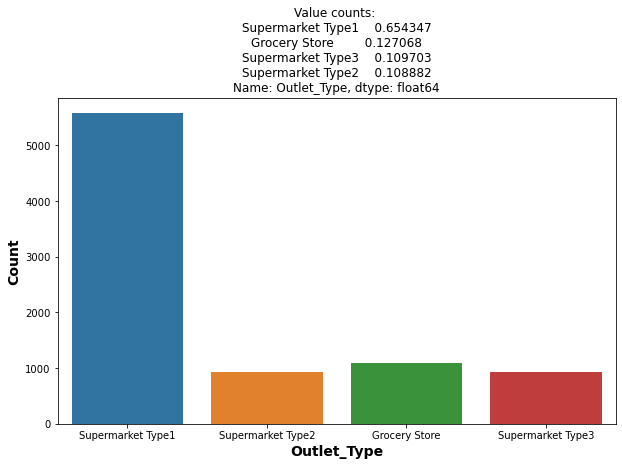

In [20]:
UVA_Categorical(train, 'Outlet_Type')

### **Observations**
* 65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.

### **New Hypothesis**
* Are the Supermarket Type 1 type of stores have more sales than other type of stores.

## **6.3 Missing Values**
In this section we are going to check whether our data contains missing values or not.

In [21]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

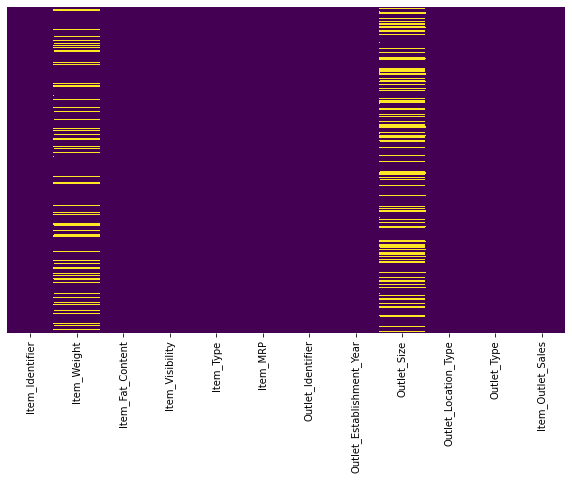

In [22]:
plt.figure(figsize = (10,6))
sns.heatmap(train.isnull(), yticklabels=False,cbar = False,cmap ='viridis')

### **Observation:**
* Yes our dataset contain missing values.
* Item_weight and Outlet_Size features contain missing values

* **Let's calculate the percentage of missing values**

In [23]:
def missing_percent():
  miss_item_weight = (train['Item_Weight'].isnull().sum()/len(train))*100
  miss_Outlet_Size = (train['Outlet_Size'].isnull().sum()/len(train))*100

  print('% of missing values in Item_Weight: ' + str(miss_item_weight))
  print('% of missing values in Outlet_Size: ' +str(miss_Outlet_Size))

In [24]:
missing_percent()

% of missing values in Item_Weight: 17.165317376510618
% of missing values in Outlet_Size: 28.27642848762173


### **Observations:**
* Since the percentage of missing values is very high so we can't drop these values otherwise we can miss some important information. Only way is to handle the missing values using some technique.

### **Things to invetigate:**
* Do the missing values of Item weight have some relation with sales of the items or any other feature.
* Do the missing values of Outlet size have some relation with any other feature.


## **6.4 Summary of Uniariate Analysis**

### **Important Observations:**
* Numerical<br>
    * The weight of the items lies in the range of 4 - 22 while the average weight of the items is 12.
    * There are some items that are not visible at all and the maximum visibility of the item is 33%.
    * The price of the items range in between Rs 31 - 265. The most expensive item in the stores is of Rs 266.89.
    * Most of the stores are established in year from 1985-1990 and 1995 to 2000.
    * From year 1990-1995 was ver bad time for people who wants to open the new store. No stores were established in between this period.
    * Most of the stores has a maximum sales in between 450 - 3900. Only few of the stores having sales more than 6000. 
  
* Categorical<br>
     *  Around 64% of the total items contains low fat while remaining contains regular fat.
     * More than 14%(ie more than 1200 items) are fruits & vegetables and snacks and foods.
     * Sale of breakfast and seafood type of items are very less.
     * All the stores are selling almost same number of items except the OUT010 and OUT019 stores.
     * 45% of the total number of items are sell from medium size store while only 15% items are sell from store which are very big.
     * 39% of the items sells from the stores laocated in Tier 3 cities, while 32% and 28% items are sells from the stores located in Tier 2 and Tier 1 cities.
     * 65% of the items are sell from Supermarket Type 1 whih is almost twice the other types of stores. i.e most of the customers prefer to buy the items from the Supermarket Type 1 stores.

* Missing Values
     * Since the percentage of missing values is very high so we can't drop these values otherwise we can miss some important information. Only way is to handle the missing values using some technique.

### **Things to investigate further in Bivariate Analysis.**
* Are the items with less visibility having more sales.
* Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.
* Are the items contains low fat have more sales than the items contains regular fat.
* Are the stores with medium size have high sale than others.
* Are the stores located in Tier 3 cities have more sale than other.
* Are the Supermarket Type 1 type of stores have more sales than other type of stores.
* Do the missing values of Item weight have some relation with sales of the items or any other feature.
* Do the missing values of Outlet size have some relation with any other feature.


## **7 Bivariate Analysis**

## **7.1 Bivariate Analysis: Numerical-Numerical**
In this section we are going to explore and analyze the data with two numerical features taking at a time.

### ** Hypothesis falling under this section.**
* Are the items with less visibility having more sales.
* Item weight might effect a sales of the product.
* Are the items with more MRP having more Outlet_Sales.

* Whenever we want to analyze two numerical features or more than two numerical features first we perform correlation test.

In [25]:
numerical = train.select_dtypes(include = ['int64','float64','Int64'])
numerical.dtypes.index

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Correlation matrix using Pearson and Spearman correlation.

In [26]:
numerical.corr(method = 'pearson')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [27]:
numerical.corr(method='spearman')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014879,0.030822,-0.009393,0.015062
Item_Visibility,-0.014879,1.000000,0.005688,-0.054924,-0.115076
Item_MRP,0.030822,0.005688,1.000000,0.003782,0.562986
Outlet_Establishment_Year,-0.009393,-0.054924,0.003782,1.000000,0.042947
Item_Outlet_Sales,0.015062,-0.115076,0.562986,0.042947,1.000000


* Heatmap

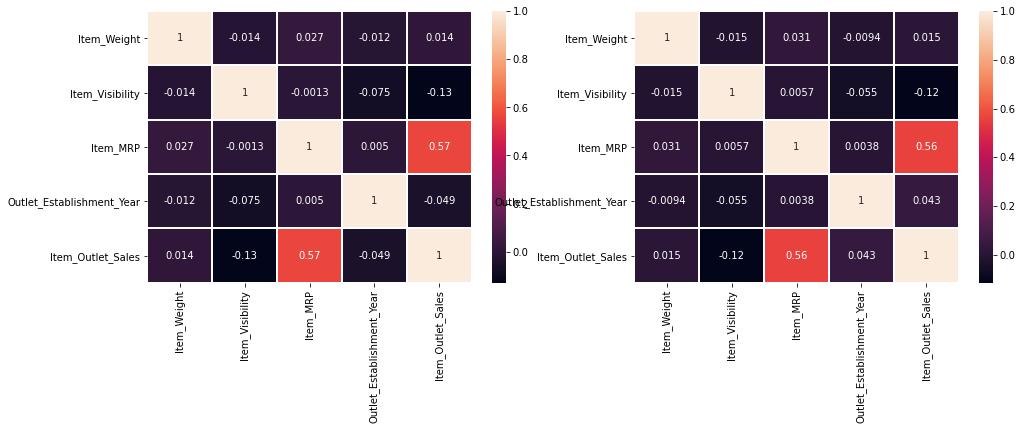

In [28]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.heatmap(numerical.corr(method = 'pearson'), cbar = True, annot = True,linewidths = 1)

plt.subplot(1,2,2)
sns.heatmap(numerical.corr(method = 'spearman'), cbar = True, annot = True,linewidths = 1)

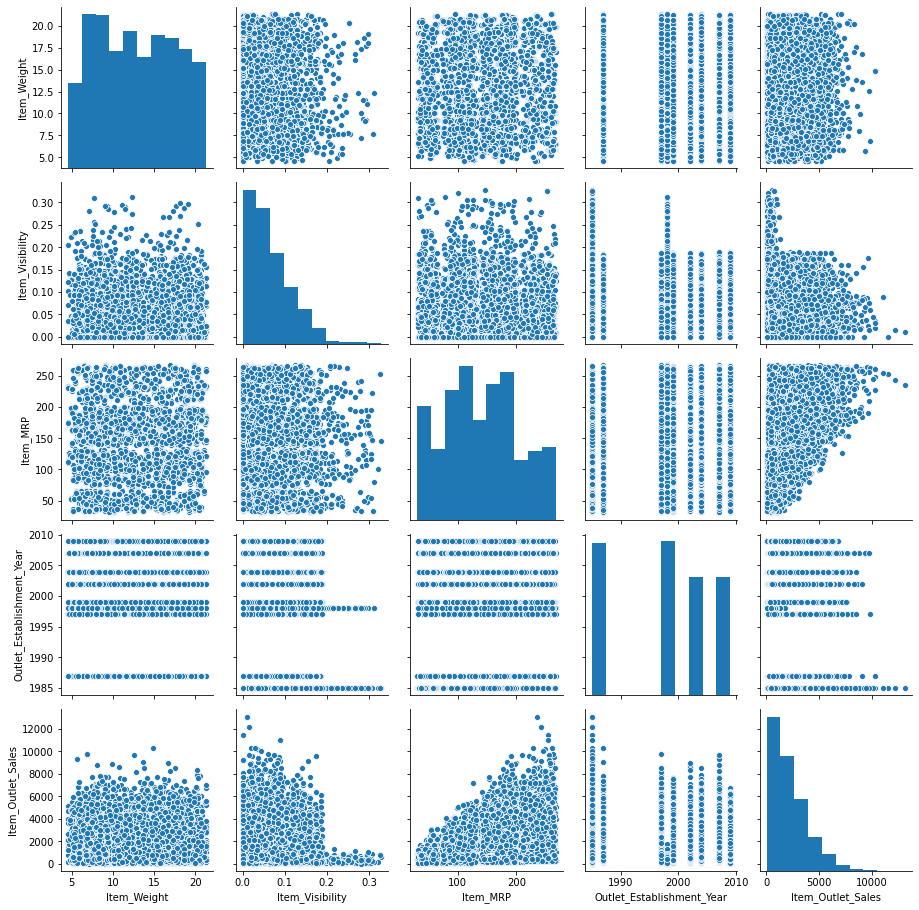

In [29]:
sns.pairplot(numerical)

### **Observation:**
* Item_MRP is somewhat correlated with Item_Outlet_Sales. So Item_MRP can be important feature for predicting Item_Outlet_Sales at particular store.
* Increase in the item_visibility can decrease the item outlet sales because it is having negative correlation.
* Item weight and Item_Establishment_Year does not have any realationship with Item_Outlet_Sales.

## **7.2 Bivariate Analysis: Numerical and Categorical**
* In this we are going to analyze our data with one categorical feature and a target variable(numerical) and also perform some hypothesis testing falling in this section.

### **Hypothesis falling under this section.**
* Are the items contain low fat have more sales than the items contain regular fat.
* Are the stores with medium size have high Item Outlet sales than others.
* Check whether the store Id OUT010 and OUT019 are recently opened store and if not then why they have sale the less number of items.
* Are the stores located in Tier 3 cities have more sales than other.
* Are the Supermarket Type 1 type of stores have more sales than other type of stores.

In [30]:
categorical = train.select_dtypes(include = 'object')
categorical.dtypes.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## **Anova test**
Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

* The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means. In that case, we cannot reject the null hypothesis.

<center>F = Between group variability / Within group variability</center>

In [31]:
def Bivariate_cont_cat(data, cont, cat, p_value, f_value, sign_level):

  # Checking hypothesis
  if p_value < sign_level and f_value > 1:
    sign = True
  else :
    sign = False

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  

  # Visualization
  plt.figure(figsize = (20,6),dpi = 120)
  

  # barplot
  plt.subplot(1,3,1)
  sns.barplot(x = cat, y = cont, data = data, hue = cat)
  plt.title('anova-test P value = {} \n anova_test F value = {} \n Significant difference = {} \n{}'.format(p_value, f_value, sign, table))
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)

  

  # Kdeplot
  #plt.subplot(1,3,2)
  #sns.kdeplot(x = cont, hue = cat, data = data,shade = True)
  #plt.title('Category Distribution', fontsize = 14, fontweight = 'bold')

  # Boxplot for checking Outliers
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot',fontsize = 14, fontweight = 'bold')
  
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)


  

* ## **Are the items contain low fat have more sales than the items contain regular fat.**

In [32]:
df_anova = train[['Item_Outlet_Sales','Item_Fat_Content']]
grouped_anova = df_anova.groupby(['Item_Fat_Content'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Low Fat')['Item_Outlet_Sales'],grouped_anova.get_group('Regular')['Item_Outlet_Sales'],
                               grouped_anova.get_group('low fat')['Item_Outlet_Sales'], grouped_anova.get_group('LF')['Item_Outlet_Sales'],
                               grouped_anova.get_group('reg')['Item_Outlet_Sales'])
print(f_value, p_value)

1.7257091657385912 0.14122147854932424


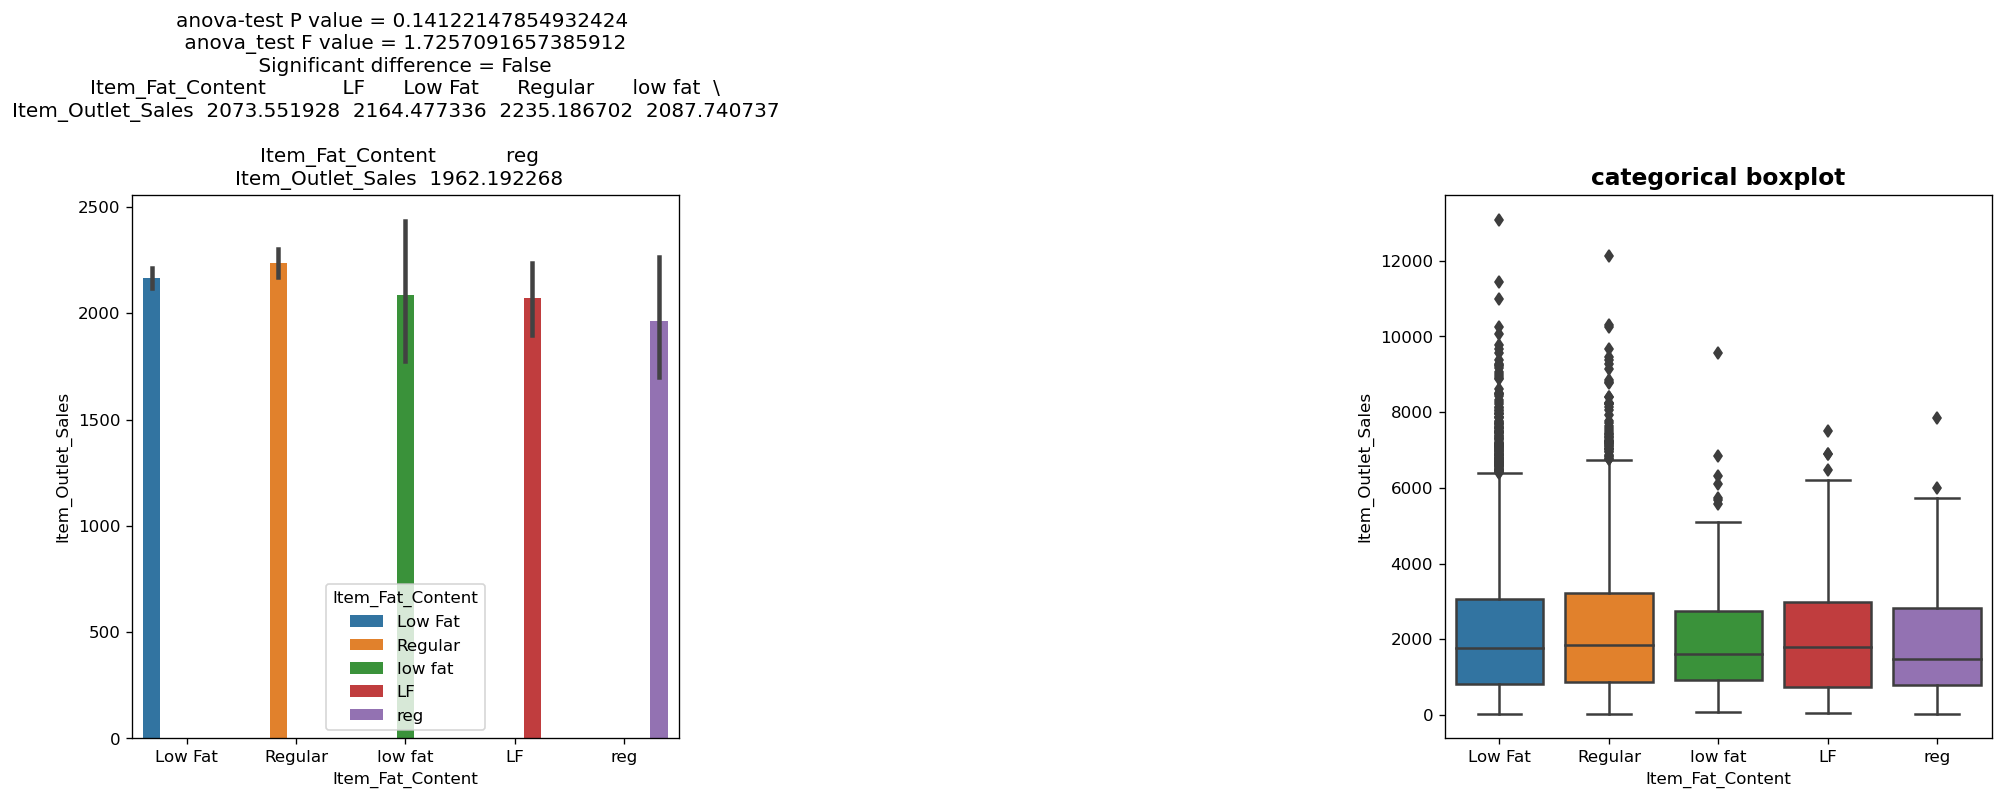

In [33]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Item_Fat_Content',p_value,f_value, 0.01)

### Observation:
* There is no significance difference with the Item Fat Content. But there may be if be treat 'low fat' , 'LF' as 'Low Fat' and 'reg' as 'Regular'
* The distribution of Item Fat Content is slightly right skew.
* Outliers shown in the boxplot is due to much difference in the Item sales of different Items.


In [34]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

* ## Item Sales Vs Item Type

In [35]:
df_anova = train[['Item_Outlet_Sales','Item_Type']]
grouped_anova = df_anova.groupby(['Item_Type'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Dairy')['Item_Outlet_Sales'],grouped_anova.get_group('Soft Drinks')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Meat')['Item_Outlet_Sales'], grouped_anova.get_group('Fruits and Vegetables')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Baking Goods')['Item_Outlet_Sales'],grouped_anova.get_group('Frozen Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breakfast')['Item_Outlet_Sales'], grouped_anova.get_group('Health and Hygiene')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Hard Drinks')['Item_Outlet_Sales'], grouped_anova.get_group('Canned')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Breads')['Item_Outlet_Sales'],grouped_anova.get_group('Starchy Foods')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Others')['Item_Outlet_Sales'],grouped_anova.get_group('Seafood')['Item_Outlet_Sales'])
print(f_value, p_value)

2.5313222772815256 0.0017939203039080086


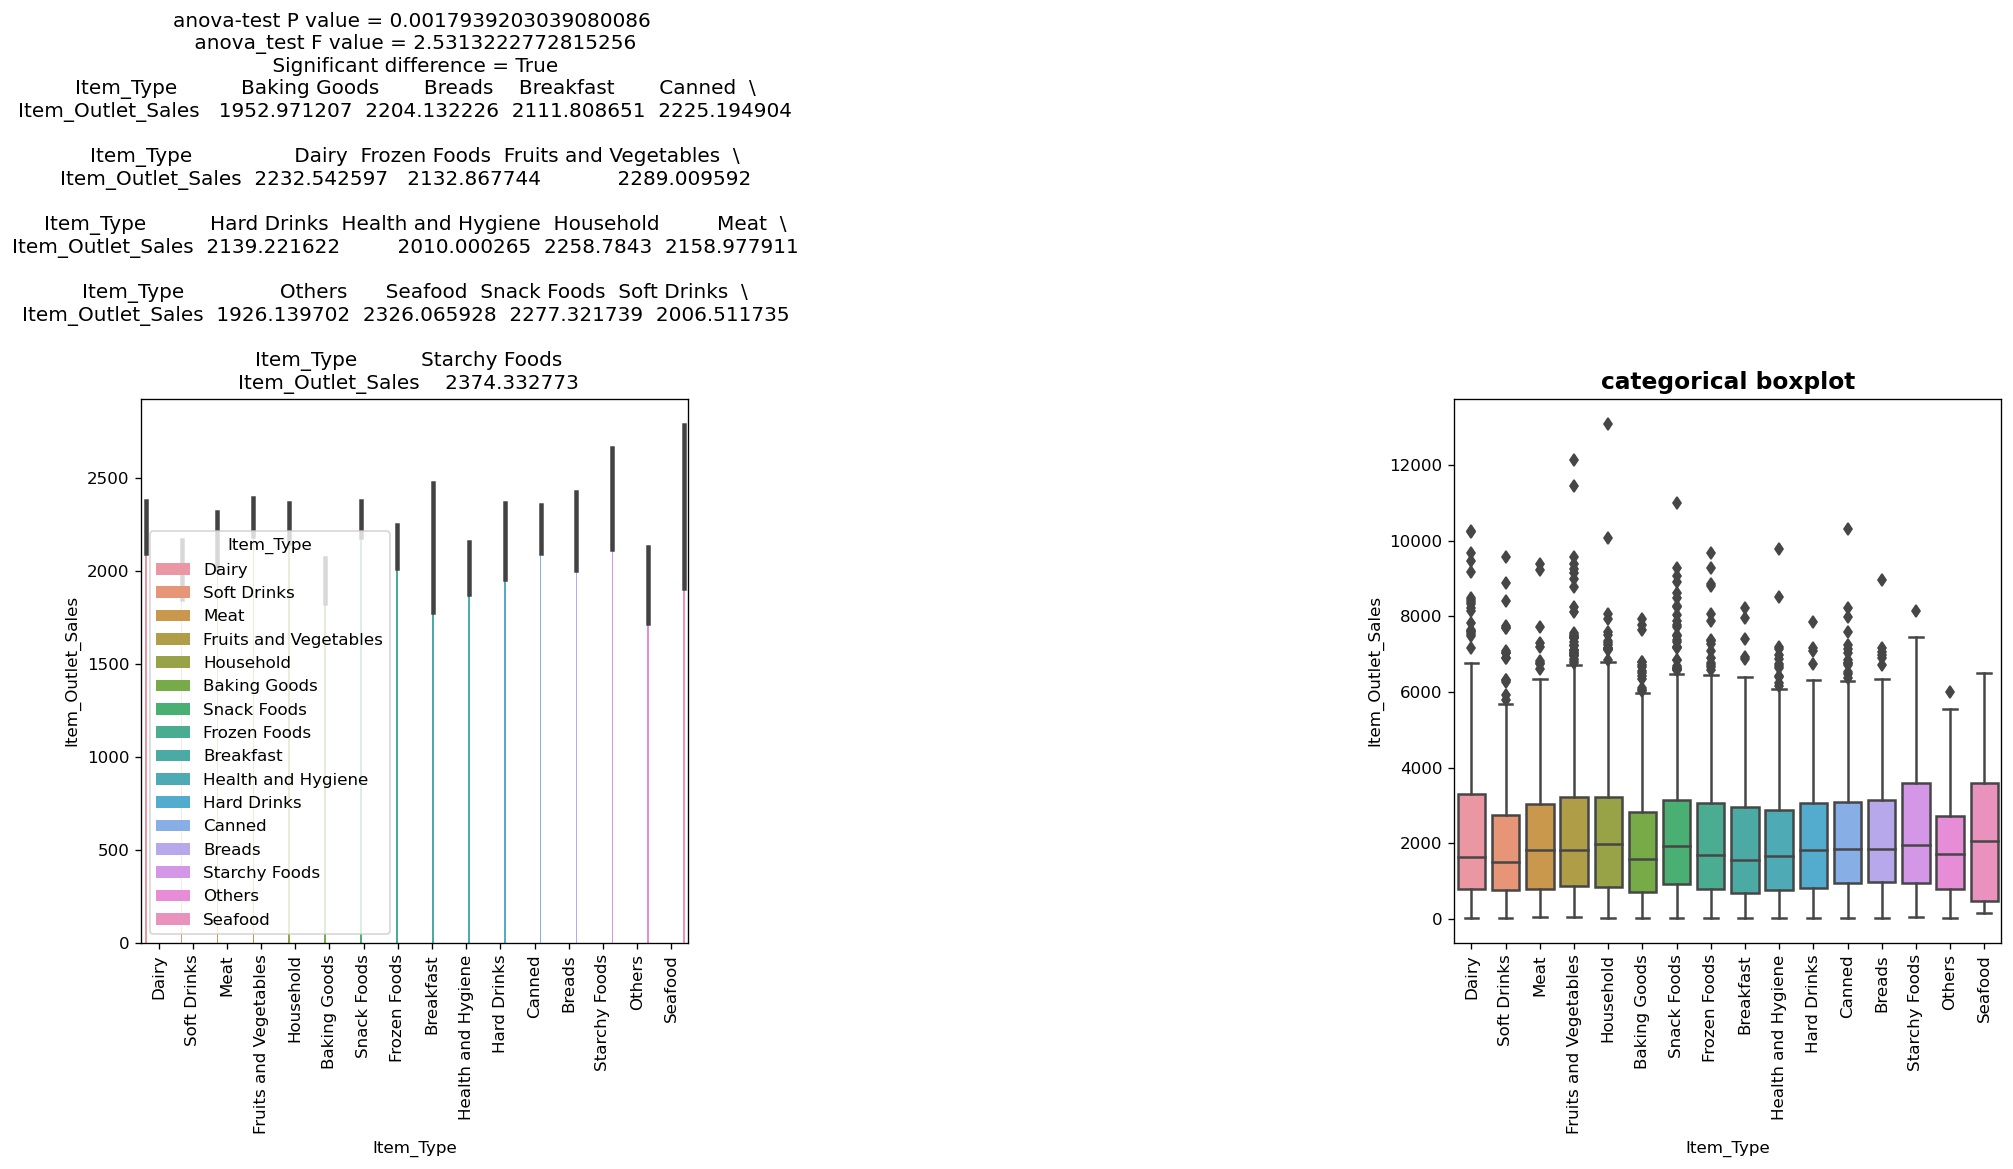

In [36]:
Bivariate_cont_cat(train, 'Item_Outlet_Sales','Item_Type',p_value, f_value, 0.05)

### Observation
* There is a significance difference between Item sales of different item types.
* Dairy products have the higher Item Outlet sales than others.

* ## **Are the stores with medium size have high sale than others.**

In [37]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [38]:
df_anova = train[['Item_Outlet_Sales','Outlet_Size']]
grouped_anova = df_anova.groupby(['Outlet_Size'])
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Medium')['Item_Outlet_Sales'],grouped_anova.get_group('High')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Small')['Item_Outlet_Sales'])
print(f_value,p_value)

131.09669439861298 1.791274552101179e-56


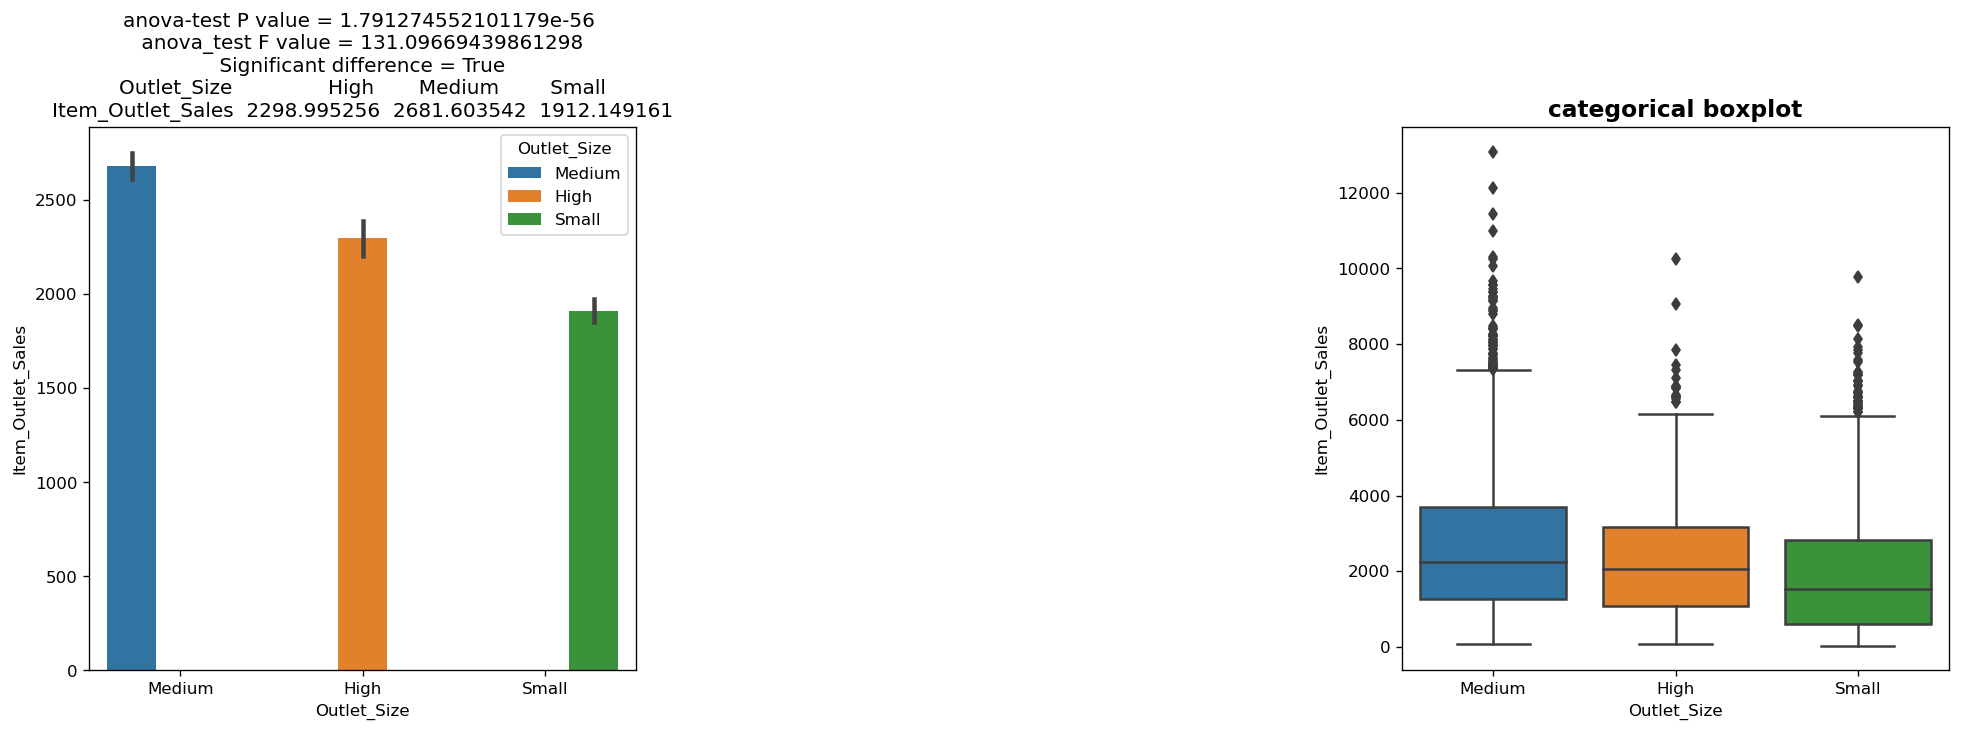

In [39]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Size',p_value, f_value, sign_level = 0.05)

### **Observation:**
* Yes there is a significance difference between Item Outlet Sales of stores with different Outlet Size.
* Medium size stores have more Item Outlet sales than others, while the small size stores have the least Item Outlet sales.
* Mean Item Outlet sales of the 'Medium' Outlet size is above 2500 while that of 'High' is below 2500 and 'Small' is of below 2000.

* ##  **Are the stores located in Tier 3 cities have more sales than other.**

In [40]:
train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [41]:
df_anova = train[['Item_Outlet_Sales','Outlet_Location_Type']]
grouped_anova = df_anova.groupby('Outlet_Location_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Tier 1')['Item_Outlet_Sales'],grouped_anova.get_group('Tier 2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Tier 3')['Item_Outlet_Sales'])
print(f_value,p_value)

53.94773987456066 5.2228172988842975e-24


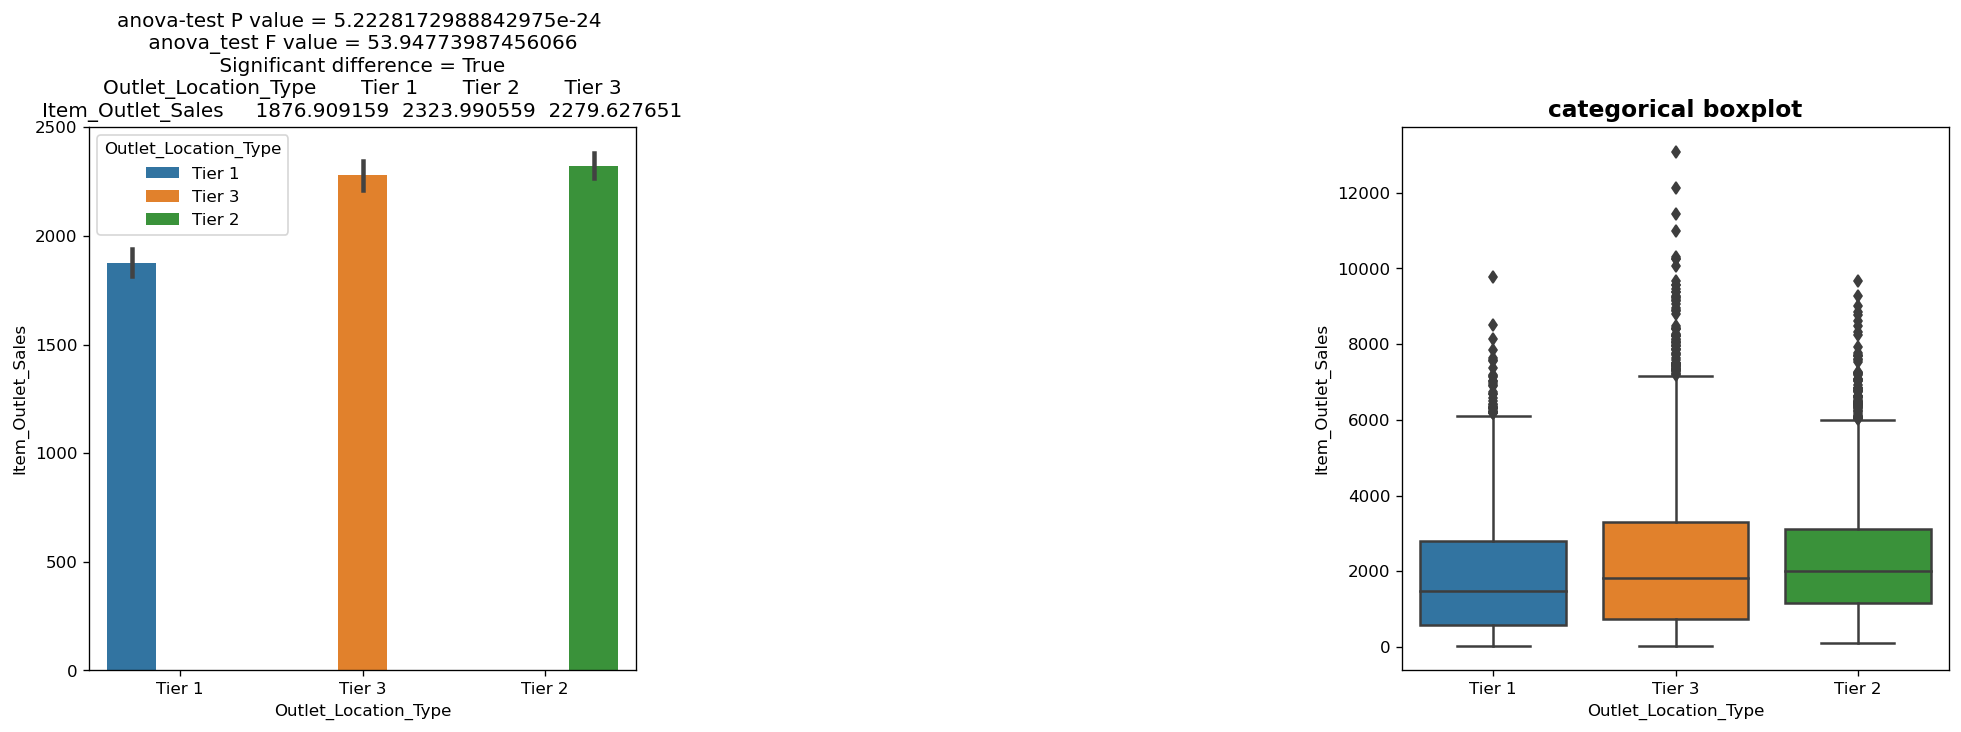

In [42]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Location_Type', p_value, f_value, sign_level = 0.05)

### **Observation:**
* There is a significance difference between the Item Outlet Sales of stores of different Outlet Location Type.
* Tier 2 cities have most sales while Tier 1 cities least sales. 
* The average sale of Tier 2 cities is 2324 while that of Tier 2279.

* ### **Are the Supermarket Type 1 type of stores have more sales than other type of stores.**

In [43]:
train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [44]:
df_anova = train[['Item_Outlet_Sales','Outlet_Type']]
grouped_anova = df_anova.groupby('Outlet_Type')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Supermarket Type1')['Item_Outlet_Sales'],grouped_anova.get_group('Supermarket Type2')['Item_Outlet_Sales'],
                               grouped_anova.get_group('Supermarket Type3')['Item_Outlet_Sales'])
print(f_value,p_value)

343.91819903375557 1.402711127727785e-143


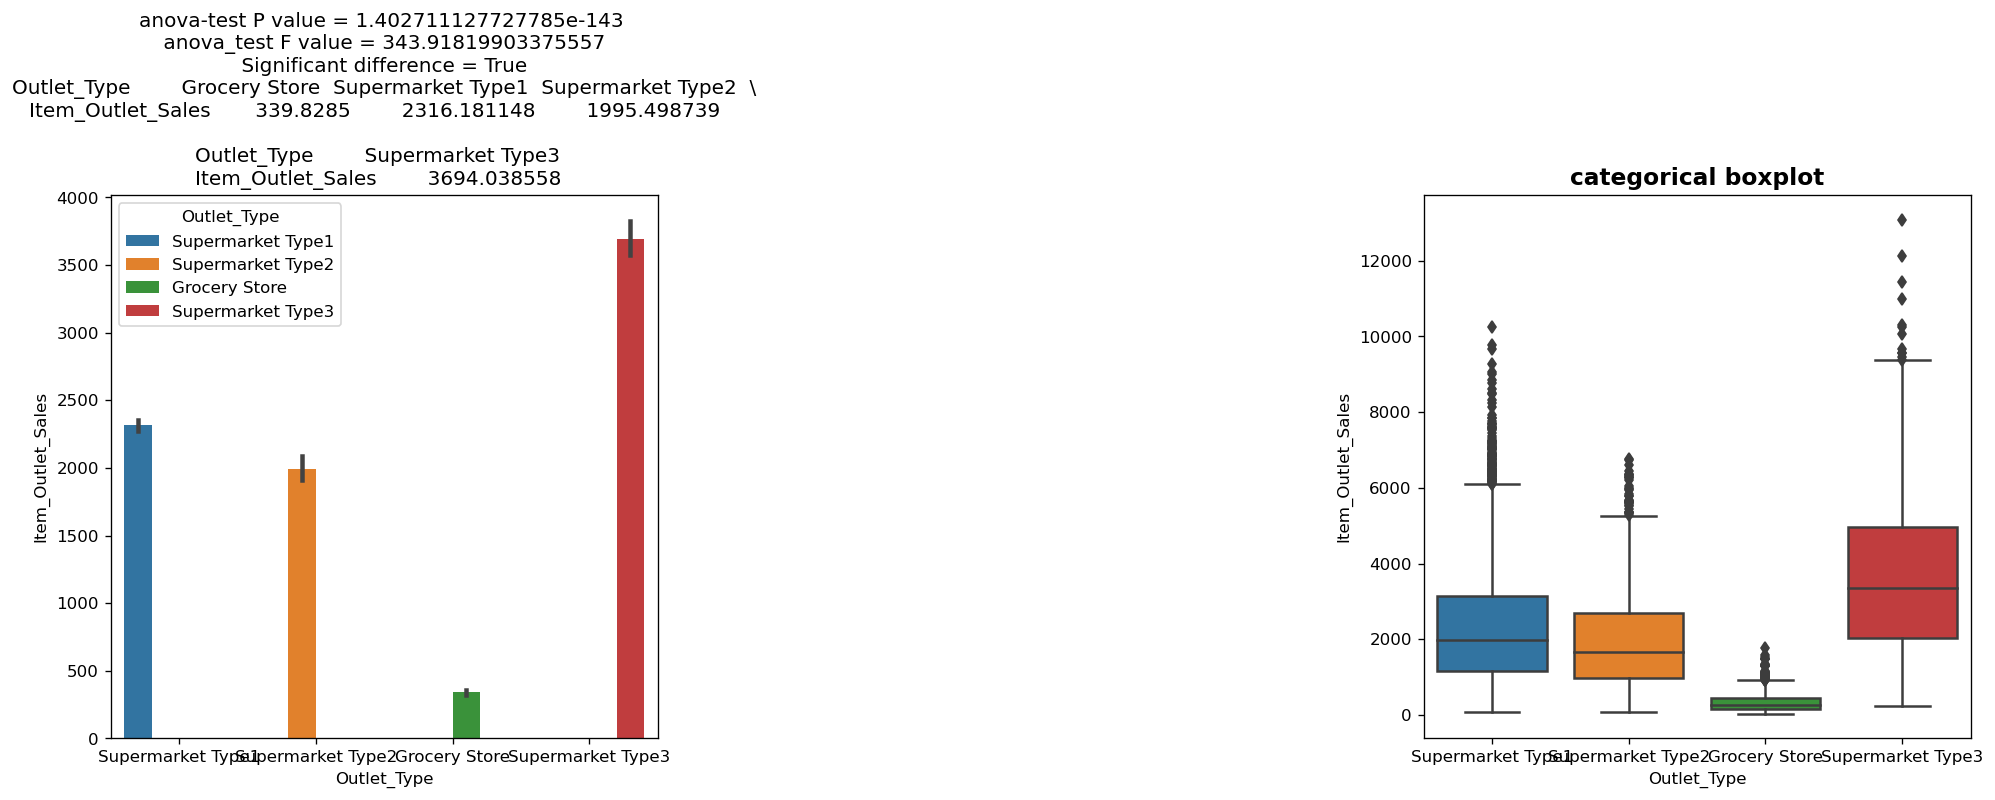

In [45]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Type', p_value,f_value, sign_level=0.05)

### **Observation:**
* There is a significance difference between the Item Outlet Sales of stores of different Outlet Type.
* No the supermarket Type 1 does not have the more sales than others
* Supermarket type 3 have more sales than others and the average sales of the Supermarket Type 3 is 3694.
* Grocery store has the least Item Outlet sales.

* ## **Are the different stores affect the Item Outlet Sales.**

In [46]:
train['Outlet_Identifier'].unique()


array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [47]:
df_anova = train[['Item_Outlet_Sales','Outlet_Identifier']]
grouped_anova = df_anova.groupby('Outlet_Identifier')
f_value, p_value = stats.f_oneway(grouped_anova.get_group('OUT049')['Item_Outlet_Sales'],grouped_anova.get_group('OUT018')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT010')['Item_Outlet_Sales'],grouped_anova.get_group('OUT013')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT027')['Item_Outlet_Sales'],grouped_anova.get_group('OUT045')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT017')['Item_Outlet_Sales'],grouped_anova.get_group('OUT046')['Item_Outlet_Sales'],
                               grouped_anova.get_group('OUT019')['Item_Outlet_Sales'],grouped_anova.get_group('OUT035')['Item_Outlet_Sales'])
print(f_value,p_value)

300.07913532849034 0.0


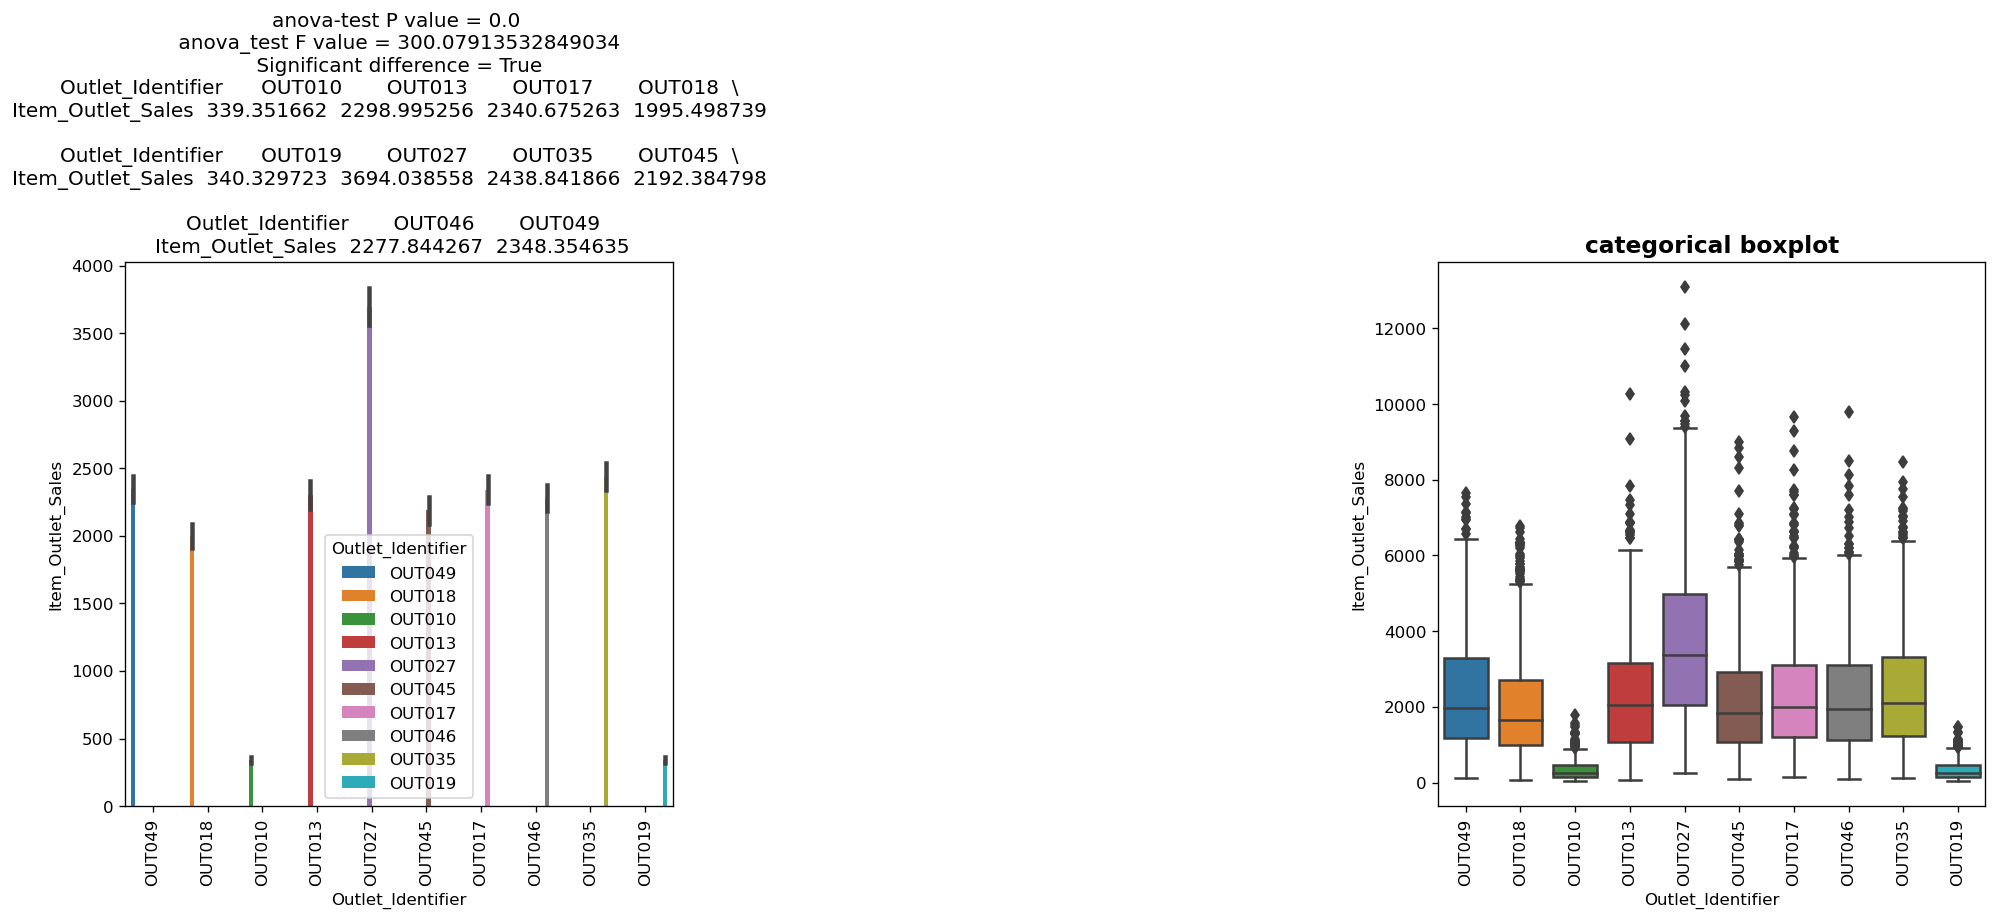

In [48]:
Bivariate_cont_cat(train,'Item_Outlet_Sales','Outlet_Identifier',p_value,f_value,sign_level = 0.05)

###**Observation:**
* There is a significance difference on the Item Outlet Sales of different stores based on store Id i.e Outlet Identifier.
* Sales of OUT049 comes from the items whose average sales lies between 200-1000.


## **7.3 Missing Values**
During Univariate analysis we find that ItemWeight and Outlet Size coontains some missing values. So in this section we are going to find the relationship and information between the missing values of different features with other features

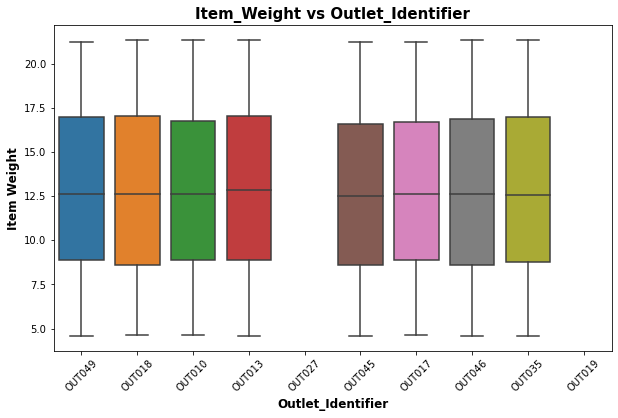

In [49]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Outlet_Identifier',y='Item_Weight',data = train)
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.xlabel('Outlet_Identifier', fontsize = 12, fontweight = 'bold')
plt.ylabel('Item Weight', fontsize = 12, fontweight = 'bold')
plt.title('Item_Weight vs Outlet_Identifier',fontsize = 15, fontweight = 'bold')
plt.show()

### **Observation**
* OUT027 and  OUT019 does not show the plot, so it is confirm that the missing information of Item Weught comes from the store ID OUT027 and OUT019.

### **Inference**
* Since Item weight of OUT027 and OUT019 have missing values, so let's check for the Outlet size.

In [50]:
df = train.copy()

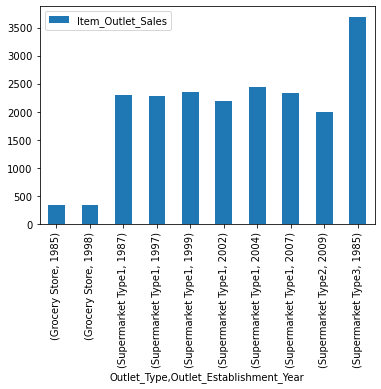

In [51]:
df.groupby(['Outlet_Type','Outlet_Establishment_Year']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(90)


                       

**Observation**- From the above figure we can conclude that the Grocery stores has lesser mean of sales.

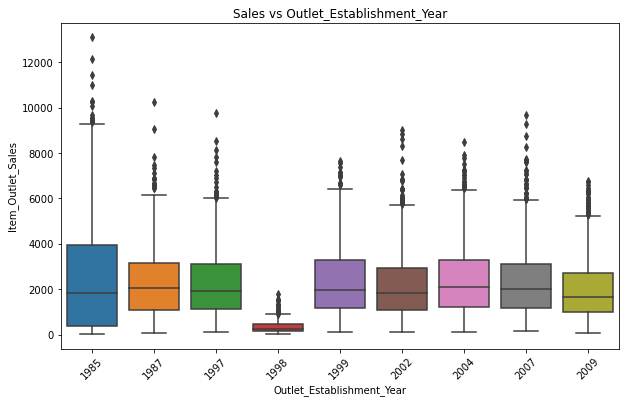

In [52]:
%matplotlib inline
plt.figure(figsize =(10,6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',data = df)

X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)
plt.title('Sales vs Outlet_Establishment_Year')
plt.show()

**Observation** - It is very clear from the above boxplot that the store which was established int year 1985 has highest sales but the stores which was established in year 1998 has minimum sales

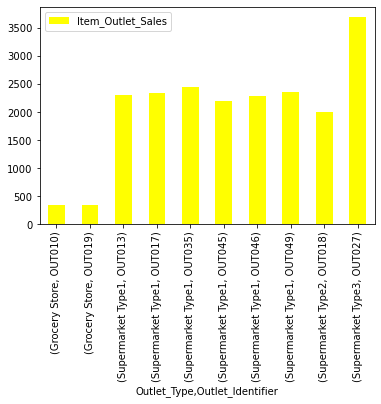

In [53]:
df.groupby(['Outlet_Type','Outlet_Identifier']).agg({'Item_Outlet_Sales':np.mean}).plot.bar(color = 'yellow')
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(90)


## **What is the Item Outlet Sales based on OutletType and Outlet Size?**

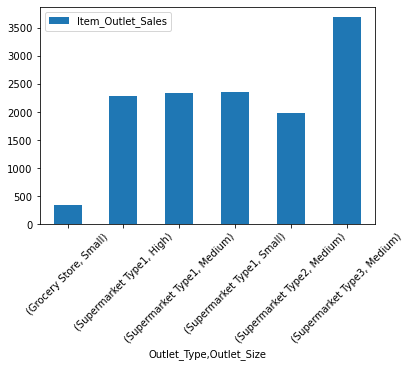

In [54]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
X=plt.gca().xaxis

# Rotating the Xicklabels
for item in X.get_ticklabels():
  item.set_rotation(45)



## **7.4 Bivariate Analysis: Summary**
* ### **Numerical- Numerical**
    * Item_MRP is somewhat correlated with Item_Outlet_Sales. So Item_MRP can be important feature for predicting Item_Outlet_Sales at particular store.
    * Increase in the item_visibility can decrease the item outlet sales because it is having negative correlation.
    * Item weight and Item_Establishment_Year does not have any realationship with Item_Outlet_Sales.

* ### **Numerical-Categorical**
    * There is no significance difference in the Item Outlet sales based on Item Weight so Item weight migh not be the much important for predicting sales. But there may be if be treat 'low fat' , 'LF' as 'Low Fat' and 'reg' as 'Regular'
    * The distribution of Item Fat Content is slightly right skew.
    * There is a significance difference in the Item Outlet sales of different item types. So this can be important for predicting Item Outlet sales.
    * Dairy products have the higher Item Outlet sales than others.
    * Yes there is a significance difference between Item Outlet Sales of stores with different Outlet Size.
    * Medium size stores have more Item Outlet sales than others, while the small size stores have the least Item Outlet sales.
    * Mean Item Outlet sales of the 'Medium' Outlet size is above 2500 while that of 'High' is below 2500 and 'Small' is of below 2000.
    * There is a significance difference between the Item Outlet Sales of stores of different Outlet Location Type.
    * Tier 2 cities have most sales while Tier 1 cities least sales. 
    * The average sale of Tier 2 cities is 2324 while that of Tier 2279.
    * * There is a significance difference between the Item Outlet Sales of stores of different Outlet Type.
    * No the supermarket Type 1 does not have the more sales than others
    * Supermarket type 3 have more sales than others and the average sales of the Supermarket Type 3 is 3694.
    * Grocery stores has the least Item Outlet sales.
    * There is a significance difference on the Item Outlet Sales of different stores based on store Id i.e Outlet Identifier.
    * Sales of OUT049 comes from the items whose average sales lies between 200-1000.

* ### **Missing values**
   * OUT027 and  OUT019 does not show the plot, so it is confirm that the missing information of Item Weught comes from the store ID OUT027 and OUT019.

Note - In this notebook, I haven't perform Categorical- Categroical Analysis.

# **THANK YOU!**